In [117]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

In [118]:
def drag_force(velocity, alpha_d):
    velocity_norm = np.linalg.norm(velocity)
    velocity_direction = velocity / velocity_norm
    return -alpha_d * velocity_norm**2 * velocity_direction

def lift_force(velocity, alpha_l):
    velocity_norm = np.linalg.norm(velocity)
    velocity_direction = velocity / velocity_norm
    rotation_matrix = np.array([[0, -1], [1,0]])
    force_direction = np.dot(rotation_matrix, velocity_direction)
    return alpha_l * velocity_norm**2 * force_direction

In [78]:
def diff_equation(position_velocity, t, alpha_d, alpha_l, mass, g):
    position = position_velocity[:2]
    velocity = position_velocity[2:]
    force = drag_force(velocity, alpha_d) + lift_force(velocity, alpha_l) + mass*g*np.array([0,-1])
    acceleration = force / mass
    return np.append(velocity, acceleration)

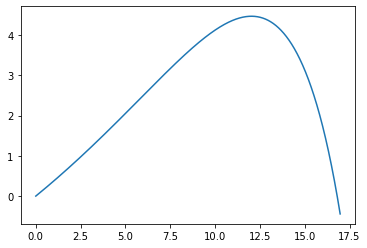

In [115]:
constants = (0.008, 0.001, 0.05, 9.81)
time = np.linspace(0, 2, 1000)

init_speed = 60
init_angle = np.radians(20)
init_conditions = np.array([0, 0, init_speed*np.cos(init_angle), init_speed*np.sin(init_angle)])

ode_solution = odeint(diff_equation, init_conditions, time, args=constants)

plt.plot(ode_solution[:,0], ode_solution[:,1])